In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Generación de ruido 

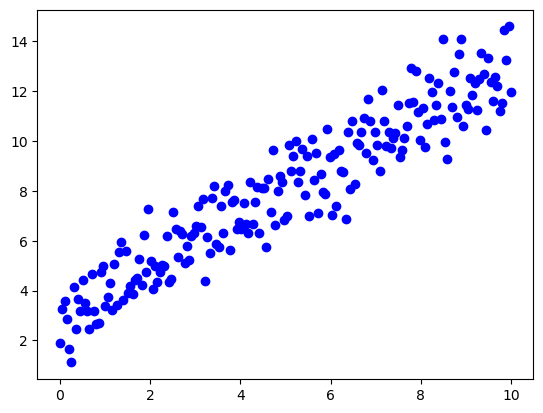

In [4]:
# y = 1*x + 3
# y = a*x + b
# 0 < x < 10
a = 1   # Representa la inclinación de la línea, cuanto más grande sea el valor más inclinación tendrá.
b = 3   # Representa la altura en la que comienza la línea.
lx = np.linspace(0, 10, 200)
ly = a*lx + b
ruido = np.random.randn(200)    # Me genera la cantidad de números aleatorios que le propongo .
ly = ly + ruido


# plt.plot(lx, ly, color = 'b') # Para que una todos los puntos con una línea.
plt.scatter(lx, ly, color = 'b') # Para pintar los puntos en el gráfico.


# ESTOS SON LOS PUNTOS DE DONDE PARTIMOS, REPRESENTANDO EL PESO CORPORAL (Y) Y LA ALTURA (X) DE CADA PERSONA

### Añadimos valores a las variables 'a' y 'b'

In [5]:
a = 10
b = 9

### Funciones auxiliares

In [6]:
def predice(x):
    y_hat = a*x + b # Calcula las Ys que le corresponde a cada X.
    return y_hat

# Función que calcula el error de cada punto nuevo hecho
# Se pasan las 'x' y las y reales 'y' devuelve el array de errores de cada 'x'
def error(x, y):
    y_hat = predice(x)
    err = y_hat - y
    return err

# Se le pasan las 'x' y las 'y' reales y devuelve el coste cuadrático medio
# 1/(2n) * ∑(yi_hat - yi)²
def coste(x, y):
    err = error(x,y)
    c = err**2
    c = c.mean()
    c = c/2
    return c

**MSE (Error Medio Cuadrático)** -> Métrica de error cuando queremos predecir un número real. [ Promedio de los errores al cuadrado ] Lo representamos en la función 'coste'

### Realización de pruebas 

pru_x  [0.50251256 2.51256281 5.02512563]
pru_y  [4.41654849 7.14903887 6.9911955 ]
estimados por el modelo  [  9  59 109]
error  [ 9.60857714 26.97658928 52.26006078]
coste  591.8625127284387


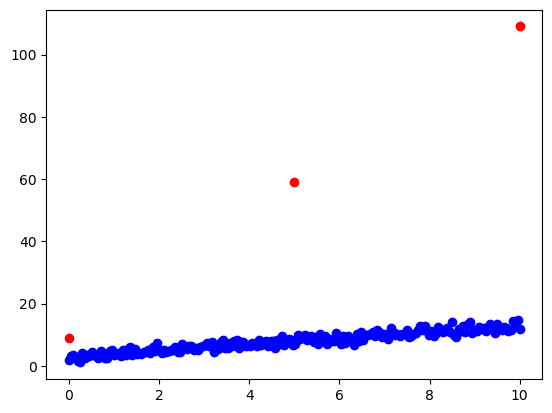

In [7]:
plt.scatter(lx, ly, color = 'b')
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])

y_hat = predice(np.array([0,5,10]))
plt.scatter([0, 5, 10], y_hat, color="r")
le = error(pru_x, pru_y )
c = coste(pru_x, pru_y)
print("pru_x ", pru_x)
print("pru_y ", pru_y)
print("estimados por el modelo ", y_hat)
print("error ", le)
print("coste ", c)

Se aplicará el descenso del gradiente
x -> x - lr X df(x)/dx

Según la regla de la cadena se multiplican las siguientes derivadas para sacar la derivada general del descenso del gradiente al haber 2 variables en lugar de 1.

In [8]:
#1/n ∑(yi_hat -yi)*xi
def deriva_coste_respecto_a(x,y):
    err = error(x,y)
    d = err*x
    d = d.mean()
    return d

def deriva_coste_repecto_a_aprox(x, y):
  global a
  inc = 0.001
  c1 = coste(x, y)
  a = a + inc
  c2 = coste(x, y)
  a = a - inc
  d = (c2-c1)/inc
  return d

#1/n ∑(yi_hat -yi) = err
def deriva_coste_respecto_b(x,y):
    d = error(x,y)
    d = d.mean()
    return d

def deriva_coste_repecto_b_aprox(x, y):
  global b
  inc = 0.001
  c1 = coste(x, y)
  b = b + inc
  c2 = coste(x, y)
  b = b - inc
  d = (c2-c1)/inc
  return d

# r2 o coeficiente de determinación
def calc_accuracy(x, y):
   err = error(x,y)
   numerador = (err ** 2).sum()
   denominador = ((y - y.mean()) ** 2).sum()
   return 1 - numerador/denominador


In [9]:
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])
lr = 0.1

In [10]:
# Método que entrena el modelo, se suelen llamar 'fit', 'epochs' es el número de vueltas que se busca que de.
def fit(x_train, y_train, batch_size=None, lr = 0.01, epochs=100, x_test = None, y_test = None):
  global a, b
  la = []
  lb = []
  lloss = []
  lloss_test = []
  if batch_size is None: batch_size = len(x_train)
  nbatchs = len(x_train)//batch_size

  for _ in range(epochs):
    # barajar
    laux = [i for i in range(len(x_train))]
    random.shuffle(laux)
    x_new = np.array([x_train[i] for i in laux])
    y_new = np.array([y_train[i] for i in laux])
    x_train = x_new
    y_train = y_new

    for lote in range(nbatchs):
      sl1 = lote*batch_size
      sl2 = sl1 + batch_size
      x_t = x_train[sl1:sl2]
      y_t = y_train[sl1:sl2]
      da = deriva_coste_respecto_a(x_t, y_t)
      db = deriva_coste_respecto_b(x_t, y_t)
      a = a - lr*da
      b = b - lr*db
      loss = coste(x_t, y_t)
      loss_test = coste(x_test, y_test)
      la.append(a); lb.append(b); lloss.append(loss); lloss_test.append(loss_test)
      #print(f"a: {a}  b: {b} loss: {loss}")
  return lloss, lloss_test,  la, lb

# Va bajando la perdida de cada vez

In [11]:
lg = int(0.8 * len(lx))

lg = int(0.8 * len(lx))

laux = [i for i in range(len(lx))]
random.shuffle(laux)
x_n = np.array([lx[i] for i in laux])
y_n = np.array([ly[i] for i in laux])

lx_train = x_n[:lg]
ly_train = y_n[:lg]
lx_test = x_n[lg:]
ly_test = y_n[lg:]

# lx_train = lx[:lg]
# ly_train = ly[:lg]
# lx_test = lx[lg:]
# ly_test = ly[lg:]

> La siguiente gráfica representa la pérdida:

a: 1.0286531355054194  b: 2.9035771401312584 loss: 0.5373290383579953 r2 = 0.890477165203466


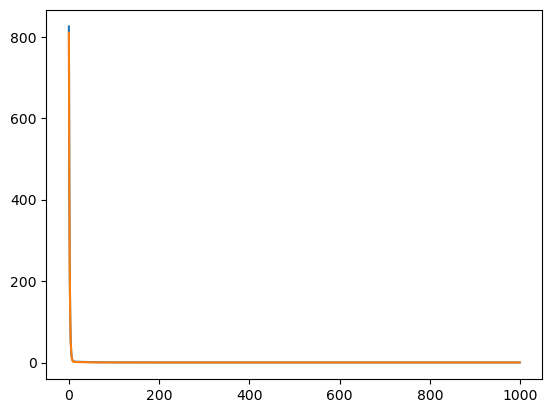

In [12]:
lloss, lloss_test, la, lb = fit(lx_train, ly_train, lr=0.05, epochs=1000,
                                batch_size=None, x_test = lx_test, y_test = ly_test)
print(f"a: {la[-1]}  b: {lb[-1]} loss: {lloss[-1]} r2 = {calc_accuracy(lx, ly)}")

plt.plot(range(len(lloss)), lloss)
plt.plot(range(len(lloss_test)), lloss_test)

In [13]:
c_train = coste(lx_train, ly_train)
c_test = coste(lx_test, ly_test)
r2_train = calc_accuracy(lx_train, ly_train)
r2_test = calc_accuracy(lx_test, ly_test)
print(f"c_train: {c_train} c_test: {c_test} r2_train: {r2_train} r2_test: {r2_test}")

c_train: 0.5373290383579953 c_test: 0.47825197036544315 r2_train: 0.8956412432945857 r2_test: 0.8590442894752379


1.0286531355054194 2.9035771401312584 [ 0 10] [ 2.90357714 13.1901085 ]


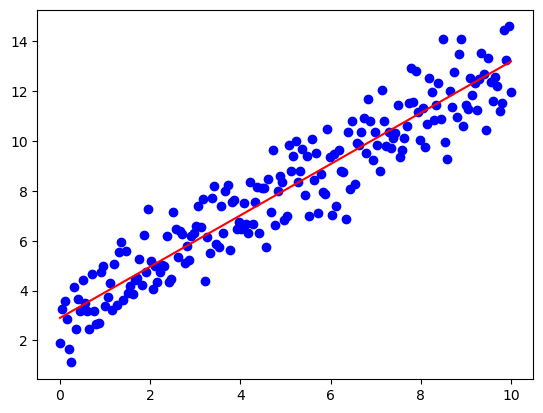

In [14]:
plt.scatter(lx, ly, color="b")
xpru = np.array([0, 10])
ypru = predice(xpru)
print(a, b, xpru, ypru)
plt.plot(xpru, ypru, color="r")

In [15]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')


def drawframe(n):
    global line
    if(n < len(la)):
      a1 = la[n]
      b1 = lb[n]
      x1 = [0, 10]
      y1 = [b1, 10*a1 + b1]
      line.set_data(x1, y1)
    #ax.set_title(f'epoch = {n/len(x):4d}'.format(n))
    return (line,)  #OJO!!! hay que retornar una tupla!!!!

global line
def dibuja_evolucion():
  global line
  fig = plt.figure()
  ax = plt.axes()
  line,  = ax.plot([0, 10], [b, 10*a + b], color="y")
  ax.scatter(lx, ly)
  # blit=True re-draws only the parts that have changed.
  anim = animation.FuncAnimation(fig, drawframe, frames=len(la)-1, interval=5, blit=False, repeat=False)
  return anim

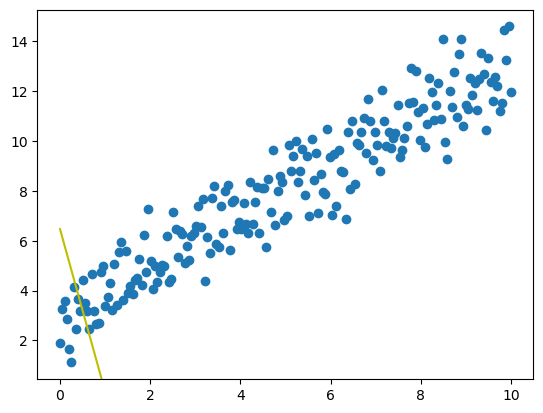

In [16]:
anim = dibuja_evolucion()
anim